# I CHING Divination

## [Download worked project](../../_static/generated/iching-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/iching)

![expected-plot-Will-I-pass-programming-exam-101100-preview](expected-plot-Will-I-pass-programming-exam-101100.png)

The I Ching, or Book of Changes, is a chinese divination manual and philosophical text  which is believed to be one of the world's oldest books, dating from over 3,000 years ago. 

The great mathematician Gottfried Wilhelm Leibniz (1646 - 1716) is considered the first information theorist, and extensively documented the binary numeral system. Leibniz was also interested in Chinese culture, and [saw in the I Ching](https://en.wikipedia.org/wiki/Gottfried_Wilhelm_Leibniz#Sinophile) diagrams showing solid and broken lines called yin and yang, which progressed in a sequence: that was unmistakably a binary encoding. 

You will parse a dataset of hexagrams and develop a divinator software which will predict the outcome of your exams.

Data source: [Wikipedia, July 2021, Bagua page](https://en.wikipedia.org/wiki/Bagua)


## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
iching-prj
    iching.ipynb
    iching-sol.ipynb
    iching.csv
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `iching.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## The dataset

**Yin and yang**: Yin and yang are represented by lines: 

|name|line|bit|
|----|-----|---|
|yin |`- -`| 0 |
|yang|`---`| 1 |

**Trigrams**: Different constructions of three yin and yang lines lead to 8 trigrams. We can express a trigram as a sequence of bits, reading lines from bottom to top. For example _Fire_ is `101`, _Thunder_ is `100`.

![iching-lookup-table-header.png](img/iching-lookup-table-header.png)

**Hexagrams**: Combining a lower trigram with an upper trigram leads to 64 hexagrams. Each hexagram can be represented as a sequence of bits and the outcome of a divination. For example trigrams _Fire_ (lower) and _Thunder_ (upper) gives outcome hexagram _Abounding_: `101100`

![iching-lookup-table.png](img/iching-lookup-table.png)

## 1. load_db

Parse [iching.csv](iching.csv) and output a dictionary mapping each sequence to a dictionary with all the information you can extract. Use CSV reader.

- in headers and first column you will find a bit sequence like `011`
- in body cells, you will **not** find a bit sequence: you will have to determine it according to the corresponding tri-sequences from the header and first column
- note for hexagrams you must extract **only** `name-en`, ignore the decimal numbers

**Example** (complete output is in file [expected_iching_db.py](expected_iching_db.py)):

```python
>>> load_db('iching.csv')
{
    '111': {'name-en': 'Heaven', 'name-ch': '乾', 'spelling': 'Qián'}
    '000': {'name-en': 'Earth', 'name-ch': '坤', 'spelling': 'Kūn'}
    '100': {'name-en': 'Thunder', 'name-ch': '震', 'spelling': 'Zhèn'}
    '010': {'name-en': 'Water', 'name-ch': '坎', 'spelling': 'Kǎn'}
    '001': {'name-en': 'Mountain', 'name-ch': '艮', 'spelling': 'Gèn'}
    '011': {'name-en': 'Air', 'name-ch': '巽', 'spelling': 'Xùn'}
    '101': {'name-en': 'Fire', 'name-ch': '離', 'spelling': 'Lí'}
    '110': {'name-en': 'Lake', 'name-ch': '兌', 'spelling': 'Duì'}
 '111111': {'name-en': 'Force'}
 '111000': {'name-en': 'Pervading'}
 '111100': {'name-en': 'Great Invigorating'}
 '111010': {'name-en': 'Attending'}
 '111001': {'name-en': 'Great Accumulating'}
 '111011': {'name-en': 'Small Harvest'}
 '111101': {'name-en': 'Great Possessing'}
     .
     .
}
```

In [1]:
import csv

def load_db(filepath):
    
    with open(filepath, encoding='utf-8', newline='') as f:        
        my_reader = csv.reader(f, delimiter=',')
        header = next(my_reader)    
        ret = {}
        
        linear = []
        
        for s in header[1:]:
            diz = {}
            tokens = s.split('\n')
            tks = tokens[0].split('\xa0')
            diz['name-en'] = tokens[2] 
            diz['name-ch'] = tks[0]
            diz['spelling'] = tks[1]
            code = tokens[1]
            ret[code] = diz
            linear.append(code)
            
        i = 1
        for row in my_reader:                                
            for j in range(1,len(row)):                
                tokens = row[j].replace('\n','').split()
                num = int(tokens[0])
                bottom = linear[i-1]
                upper = linear[j-1]
                ret[bottom + upper] = {
                    'name-en':' '.join(tokens[1:])
                }
            i += 1            
        return ret
    

iching_db = load_db('iching.csv')   
iching_db


In [1]:
import csv

def load_db(filepath):
    raise Exception('TODO IMPLEMENT ME !')

iching_db = load_db('iching.csv')   
iching_db


In [3]:
# EXECUTE FOR TESTING
from pprint import pformat; from expected_iching_db import expected_iching_db
for seq in expected_iching_db.keys():
    if seq not in iching_db: print('\nERROR: MISSING sequence', seq); break    
    for k in expected_iching_db[seq]:
        if k not in iching_db[seq]:
            print('\nERROR at sequence', seq,'\n\n   MISSING key:', k); break    
        if expected_iching_db[seq][k] != iching_db[seq][k]:
            print('\nERROR at sequence', seq, 'key:',k)
            print('  ACTUAL:\n', pformat(iching_db[seq][k]))
            print('  EXPECTED:\n', pformat(expected_iching_db[seq][k]))
            break

## 2. divine

A divination is done by flipping 3 coins to determine the bottom trigram (**bottom up order**), flipping other three coins for the upper trigram (again **bottom up order**), and then the union gives the resulting hexagram. Write a function that PRINTS the process as in the example and RETURNS a string of bits representing the resulting hexagram

**HINT**: to flip coins use `random.randint(0,1)`


<div class="alert alert-warning">
    
**WARNING: DOUBLE CHECK THE ORDER IN WHICH LINES ARE VISUALIZED!**    
    
</div>    

**Example**: 



```python
>>> divination = divine(iching_db, "Will I pass the exam?")
>>> print("\nRETURNED:", divination)
```
```
Dear stranger, welcome to SOFTPYTHON I CHING 易經 DIVINATOR

Tell me your question...

        Will I pass the exam?

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'heads' : we get a yang ---

The sacred bottom trigram is:

Fire

   ---
   - -
   ---

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'tails' : we get a  yin - -

The sacred upper trigram is:

Thunder

   - -
   - -
   ---

The final response hexagram is...

Abounding

   - -
   - -
   ---
   ---
   - -
   ---

RETURNED: 101100
```

In [4]:

import random

def divine(iching, question):
    
    #THE SEED DETERMINES FOLLOWING randint RESULTS
    random.seed(109)      # Abounding
                          # Thunder  
                          # Fire
        
    #IMPORTANT: try also this seed to check lines visualization order
    #random.seed(1)                                  
    #
    # Infiltrating 001011
    # Mountain ---
    #          ---
    #          - -
    # Air      ---
    #          - -
    #          - -            
    
    
    print()
    print("Dear stranger, welcome to SOFTPYTHON I CHING 易經 DIVINATOR")
    print()
    print("Tell me your question...")
    print()    
    print('       ', question)
    print()
    
    def get_trigram(part):
        lst = []
        stack = []
        for i in range(3):
            r = random.randint(0,1)
            kind = 'yang' if r else ' yin'
            line = '---' if r else '- -'
            coin = "'heads'" if r else "'tails'"
            print('The coin says', coin, ': we get a', kind, line)
            stack.append(line)
            lst.append(str(r))
        stack.reverse()
        digits = ''.join(lst)
        print()    
        print("The sacred", part, "trigram is:",)
        print()    

        print(iching[digits]['name-en'])
        print()
        print('   ' + '\n   '.join(stack))
            
        return (stack, ''.join(lst))
    
    bottom = get_trigram('bottom')
    print()
    upper = get_trigram('upper')        
            
    print()
    print('The final response hexagram is...')
    print()
    print(iching[bottom[1] + upper[1]]['name-en'])
    print()
    print('   ' + '\n   '.join(upper[0] + bottom[0]))
        
    return bottom[1] + upper[1]
    

divination = divine(iching_db, "Will I pass the exam?")
print("\nRETURNED:", divination)


Dear stranger, welcome to SOFTPYTHON I CHING 易經 DIVINATOR

Tell me your question...

        Will I pass the exam?

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'heads' : we get a yang ---

The sacred bottom trigram is:

Fire

   ---
   - -
   ---

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'tails' : we get a  yin - -

The sacred upper trigram is:

Thunder

   - -
   - -
   ---

The final response hexagram is...

Abounding

   - -
   - -
   ---
   ---
   - -
   ---

RETURNED: 101100


In [4]:

import random

def divine(iching, question):
    
    #THE SEED DETERMINES FOLLOWING randint RESULTS
    random.seed(109)      # Abounding
                          # Thunder  
                          # Fire
        
    #IMPORTANT: try also this seed to check lines visualization order
    #random.seed(1)                                  
    #
    # Infiltrating 001011
    # Mountain ---
    #          ---
    #          - -
    # Air      ---
    #          - -
    #          - -            
    
    raise Exception('TODO IMPLEMENT ME !')

divination = divine(iching_db, "Will I pass the exam?")
print("\nRETURNED:", divination)

## 3. plot_divination

Given a divination as a string of bits, plot the divination. 

* first draw the lines, then the rest if you have time. 
* make it fancy with these [examples](https://en.softpython.org/visualization/visualization-sol.html#Fancy-plots)
* to center text you can use these parameters: `ha='center', va='center'`

![expected-plot-Will-I-pass-programming-exam-101100.png](expected-plot-Will-I-pass-programming-exam-101100.png)

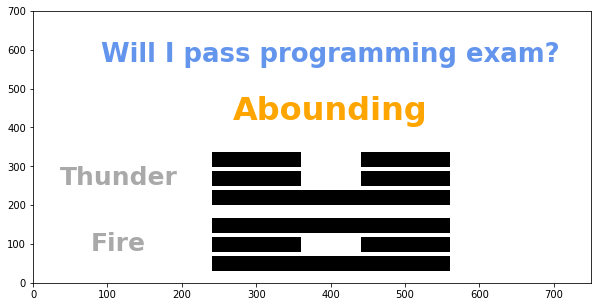

In [5]:

%matplotlib inline
import matplotlib.pyplot as plt

def plot_divination(iching, question, divination):
    
    
    fig = plt.figure(figsize=(10,5))
    
    plt.xlim(0,750)
    plt.ylim(0,700)
    
    xl = 150
    yd = 50
    segw = 100
    midx = 400

    def plot_trigram(seq, yl):
        plt.text(xl-35,
                 yl + yd*2,
                 iching[seq]['name-en'],
                 fontsize=25,
                 fontweight='bold',
                 color="darkgray",
                 ha='center',
                 va='center')

        lw = 15
        for i in range(3):
            h = yl + yd*(i+1)
            if seq[i] == '0':
                plt.plot([xl + segw,xl + segw*2], [h,h],
                         color='black',
                         linewidth=lw)                
                
                plt.plot([xl + segw*3, xl + segw*4], [h,h],
                         color='black',
                         linewidth=lw)
            else:
                plt.plot([xl + segw,xl + segw*4], [h,h],
                         color='black',
                         linewidth=lw)

    plt.text(midx,
             570,
             question,
             fontsize=26,
             fontweight='bold',
             color="CornflowerBlue", 
             ha='center')
                
    plot_trigram(divination[:3], 0)
    plot_trigram(divination[3:], 170)
        
    plt.text(midx,
             420,
             iching[divination]['name-en'],
             fontsize=32,
             fontweight='bold',
             color="orange",
             ha='center')
                    
    
    plt.show()
    
    
plot_divination(iching_db, "Will I pass programming exam?", '101100')  # Abounding
#plot_divination(iching_db, "Will I pass programming exam?", '111011') # Small Harvest
#plot_divination(iching_db, "Will I pass programming exam?",'001011')  # Infiltrating

In [5]:

%matplotlib inline
import matplotlib.pyplot as plt

def plot_divination(iching, question, divination):
    raise Exception('TODO IMPLEMENT ME !')
    
plot_divination(iching_db, "Will I pass programming exam?", '101100')  # Abounding
#plot_divination(iching_db, "Will I pass programming exam?", '111011') # Small Harvest
#plot_divination(iching_db, "Will I pass programming exam?",'001011')  # Infiltrating